In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [211]:
gv_load='Resources/gun_violence_final.csv'
gv_df=pd.read_csv(gv_load)
gv_df.head()


,Incident_ID,Incident Date,State,City Or County,Address,# Killed,# Injured,TotalVictim,Month/Year,Year
0,97407,2016-01-2014,Oklahoma,Ardmore,H St NE and Martin Luther King Blvd,2,5,7,201401,2014
1,95550,12-01-2014,Alabama,Huntsville,University Drive,0,5,5,201401,2014
2,95579,12-01-2014,Illinois,Elgin,300 block of North Street,0,5,5,201401,2014
3,97365,2016-01-2014,Utah,Spanish Fork,37 N. 630 West,5,0,5,201401,2014
4,113665,27-01-2014,Washington,Seattle,2nd Avenue South and South Main Street,1,4,5,201401,2014


# Incident Numbers according to States

In [310]:
gv_df["State"].value_counts().head()

California    91
Illinois      86
Texas         62
Florida       61
Georgia       45
Name: State, dtype: int64

In [309]:
grouped_data=gv_df.groupby("State")
grouped_data.count().head()

,Incident_ID,Incident Date,City Or County,Address,# Killed,# Injured,TotalVictim,Month/Year,Year
State,,,,,,,,,
Alabama,28,28,28,28,28,28,28,28,28
Alaska,1,1,1,1,1,1,1,1,1
Arizona,13,13,13,13,13,13,13,13,13
Arkansas,9,9,9,9,9,9,9,9,9
California,91,91,91,91,91,91,91,91,91


In [7]:
df_1=pd.DataFrame({
    "States": grouped_data["State"].unique(),
    "# Incidents":grouped_data["State"].count()
})
df_1.head()

,States,# Incidents
State,,
Alabama,[Alabama],28
Alaska,[Alaska],1
Arizona,[Arizona],13
Arkansas,[Arkansas],9
California,[California],91


In [8]:
df_1=df_1.sort_values('# Incidents', ascending = False)
df_2=df_1[:5].copy()

new_row = pd.DataFrame(data = {
    'States' : ['Others'],
    '# Incidents' : [df_1['# Incidents'][5:].sum()]
})

df_2 = pd.concat([df_2, new_row])
df_2

,States,# Incidents
California,[California],91
Illinois,[Illinois],86
Texas,[Texas],62
Florida,[Florida],61
Georgia,[Georgia],45
0,Others,534


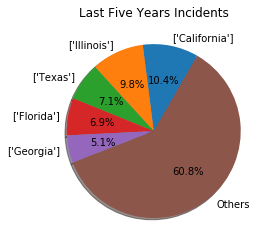

In [10]:
plt.pie(df_2["# Incidents"],labels=df_2["States"],autopct="%1.1f%%",shadow=True, startangle=60)
plt.title("Last Five Years Incidents")
plt.savefig("PercentangeStates_Final.png")

# Cleaning gun sales csv file

In [4]:
gun_load='Resources/nics-firearm-background-checks.csv'
gun_df=pd.read_csv(gun_load)
gun_df.head()

,monthyr_num,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,201907,2019-07,Alabama,33116.0,865.0,8711.0,5851.0,410.0,353,0.0,...,0.0,0.0,0.0,20.0,9.0,4.0,0.0,1.0,0.0,51757
1,201907,2019-07,Alaska,167.0,24.0,2172.0,2139.0,247.0,151,0.0,...,0.0,0.0,0.0,11.0,15.0,2.0,1.0,0.0,0.0,5298
2,201907,2019-07,Arizona,5181.0,489.0,11005.0,5995.0,1203.0,651,0.0,...,0.0,0.0,0.0,13.0,12.0,5.0,0.0,0.0,0.0,26325
3,201907,2019-07,Arkansas,2687.0,645.0,4049.0,3487.0,289.0,305,5.0,...,0.0,0.0,0.0,5.0,8.0,1.0,0.0,0.0,0.0,13684
4,201907,2019-07,California,27930.0,0.0,30400.0,20830.0,3485.0,0,6259.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89532


In [7]:
gun_df["Total Sales"]=gun_df["handgun"]+gun_df["long_gun"]+gun_df["other"]+gun_df["multiple"]
gun_df.head()

,monthyr_num,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Total Sales
0,201907,2019-07,Alabama,33116.0,865.0,8711.0,5851.0,410.0,353,0.0,...,0.0,0.0,20.0,9.0,4.0,0.0,1.0,0.0,51757,15325.0
1,201907,2019-07,Alaska,167.0,24.0,2172.0,2139.0,247.0,151,0.0,...,0.0,0.0,11.0,15.0,2.0,1.0,0.0,0.0,5298,4709.0
2,201907,2019-07,Arizona,5181.0,489.0,11005.0,5995.0,1203.0,651,0.0,...,0.0,0.0,13.0,12.0,5.0,0.0,0.0,0.0,26325,18854.0
3,201907,2019-07,Arkansas,2687.0,645.0,4049.0,3487.0,289.0,305,5.0,...,0.0,0.0,5.0,8.0,1.0,0.0,0.0,0.0,13684,8130.0
4,201907,2019-07,California,27930.0,0.0,30400.0,20830.0,3485.0,0,6259.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89532,54715.0


In [8]:
new = gun_df["month"].str.split("-", n = 1, expand = True)
gun_df["Year"]=new[0]
gun_df.head()

,monthyr_num,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Total Sales,Year
0,201907,2019-07,Alabama,33116.0,865.0,8711.0,5851.0,410.0,353,0.0,...,0.0,20.0,9.0,4.0,0.0,1.0,0.0,51757,15325.0,2019
1,201907,2019-07,Alaska,167.0,24.0,2172.0,2139.0,247.0,151,0.0,...,0.0,11.0,15.0,2.0,1.0,0.0,0.0,5298,4709.0,2019
2,201907,2019-07,Arizona,5181.0,489.0,11005.0,5995.0,1203.0,651,0.0,...,0.0,13.0,12.0,5.0,0.0,0.0,0.0,26325,18854.0,2019
3,201907,2019-07,Arkansas,2687.0,645.0,4049.0,3487.0,289.0,305,5.0,...,0.0,5.0,8.0,1.0,0.0,0.0,0.0,13684,8130.0,2019
4,201907,2019-07,California,27930.0,0.0,30400.0,20830.0,3485.0,0,6259.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89532,54715.0,2019


In [18]:
gun_df["Year"]=pd.to_numeric(gun_df["Year"], errors='coerce')

In [19]:
gun_df.dtypes

monthyr_num                    int64
month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
t

In [21]:
gun_df_1=gun_df[gun_df.Year > 2013]
gun_df_1

,monthyr_num,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Total Sales,Year
0,201907,2019-07,Alabama,33116.0,865.0,8711.0,5851.0,410.0,353,0.0,...,0.0,20.0,9.0,4.0,0.0,1.0,0.0,51757,15325.0,2019
1,201907,2019-07,Alaska,167.0,24.0,2172.0,2139.0,247.0,151,0.0,...,0.0,11.0,15.0,2.0,1.0,0.0,0.0,5298,4709.0,2019
2,201907,2019-07,Arizona,5181.0,489.0,11005.0,5995.0,1203.0,651,0.0,...,0.0,13.0,12.0,5.0,0.0,0.0,0.0,26325,18854.0,2019
3,201907,2019-07,Arkansas,2687.0,645.0,4049.0,3487.0,289.0,305,5.0,...,0.0,5.0,8.0,1.0,0.0,0.0,0.0,13684,8130.0,2019
4,201907,2019-07,California,27930.0,0.0,30400.0,20830.0,3485.0,0,6259.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89532,54715.0,2019
5,201907,2019-07,Colorado,6156.0,0.0,15550.0,9601.0,1238.0,916,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33812,27305.0,2019
6,201907,2019-07,Connecticut,6838.0,477.0,4235.0,1403.0,409.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13362,6047.0,2019
7,201907,2019-07,Delaware,227.0,0.0,1410.0,936.0,107.0,65,0.0,...,0.0,40.0,12.0,3.0,2.0,1.0,0.0,2873,2518.0,2019
8,201907,2019-07,District of Columbia,250.0,0.0,105.0,4.0,0.0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,375,112.0,2019
9,201907,2019-07,Florida,14674.0,0.0,43914.0,13570.0,3307.0,1968,3.0,...,0.0,212.0,108.0,29.0,43.0,39.0,0.0,84024,62759.0,2019


In [214]:
gun_df_1=gun_df_1.drop(columns="returned_other")
gun_df_1.head()

,monthyr_num,month,state,handgun,long_gun,other,multiple,Total Sales,Year
0,201907,2019-07,Alabama,8711.0,5851.0,410.0,353,15325.0,2019
1,201907,2019-07,Alaska,2172.0,2139.0,247.0,151,4709.0,2019
2,201907,2019-07,Arizona,11005.0,5995.0,1203.0,651,18854.0,2019
3,201907,2019-07,Arkansas,4049.0,3487.0,289.0,305,8130.0,2019
4,201907,2019-07,California,30400.0,20830.0,3485.0,0,54715.0,2019


In [55]:
#gun_df_1.to_csv("gun_sales_cleaned.csv", index=False, header=True)

# Gun Sales according to States

In [308]:
group_gun_sale=gun_df_1.groupby("state")
group_gun_sale["Total Sales"].sum().head()

state
Alabama       1553783.0
Alaska         416171.0
Arizona       1469161.0
Arkansas       863977.0
California    5233477.0
Name: Total Sales, dtype: float64

In [307]:
group_gun_sale["state"].unique().head()

state
Alabama          [Alabama]
Alaska            [Alaska]
Arizona          [Arizona]
Arkansas        [Arkansas]
California    [California]
Name: state, dtype: object

In [62]:
df_gun=pd.DataFrame({
    "States": group_gun_sale["state"].unique(),
    "# Gun Sales":group_gun_sale["Total Sales"].sum()
})
df_gun.head()

,States,# Gun Sales
state,,
Alabama,[Alabama],1553783.0
Alaska,[Alaska],416171.0
Arizona,[Arizona],1469161.0
Arkansas,[Arkansas],863977.0
California,[California],5233477.0


In [64]:
df_gun=df_gun.sort_values('# Gun Sales', ascending = False)
df_gun_1=df_gun[:5].copy()

new_row = pd.DataFrame(data = {
    'States' : ['Others'],
    '# Gun Sales' : [df_gun['# Gun Sales'][5:].sum()]
})

df_gun_1 = pd.concat([df_gun_1, new_row])
df_gun_1

,States,# Gun Sales
Texas,[Texas],6056598.0
California,[California],5233477.0
Florida,[Florida],5113968.0
Pennsylvania,[Pennsylvania],4004212.0
Ohio,[Ohio],3211460.0
0,Others,48844049.0


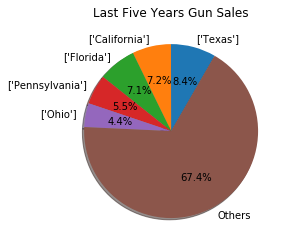

In [65]:
plt.pie(df_gun_1["# Gun Sales"],labels=df_gun_1["States"],autopct="%1.1f%%",shadow=True, startangle=60)
plt.title("Last Five Years Gun Sales")
#plt.savefig("Gun_Sales_States_Percentage.png")

# Change in Gun Sales

In [426]:
group_gun_year=gun_df_1.groupby(["Year"])
sum_val_year=group_gun_year["Total Sales"].sum()
df_year=pd.DataFrame({"Total Sales":sum_val_year})
df_year.head()

,Total Sales
Year,
2014,12236352.0
2015,13385123.0
2016,14917869.0
2017,13097896.0
2018,12244031.0


In [428]:
x_axis_year=list(df_year.index)
x_axis_year

[2014, 2015, 2016, 2017, 2018, 2019]

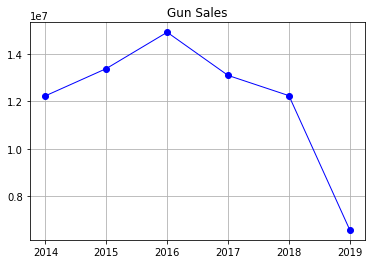

In [433]:
plt.plot(x_axis_year, df_year["Total Sales"], marker="o",color="blue", linewidth=1)
plt.grid()
plt.title("Gun Sales")
#plt.xticks(rotation=45)
#plt.savefig("Images/gun_sales_all_years.png")

In [79]:
group_gun_month=gun_df_1.groupby(["Year","month"])
sum_val=group_gun_month["Total Sales"].sum()
df_1=pd.DataFrame({"Total Sales":sum_val})
df_1.head()

Total Sales
Year month               
2014 2014-01     908087.0
     2014-02    1153864.0
     2014-03    1158365.0
     2014-04     930271.0
     2014-05     814389.0

In [306]:
df_2=df_1.reset_index().pivot("month", "Year", "Total Sales")
df_2.head()

Year,2014,2015,2016,2017,2018,2019
month,,,,,,
2014-01,908087.0,NaN,NaN,NaN,NaN,NaN
2014-02,1153864.0,NaN,NaN,NaN,NaN,NaN
2014-03,1158365.0,NaN,NaN,NaN,NaN,NaN
2014-04,930271.0,NaN,NaN,NaN,NaN,NaN
2014-05,814389.0,NaN,NaN,NaN,NaN,NaN


In [93]:
gun_2014=df_2[2014].dropna()
x_axis=list(gun_2014.index)


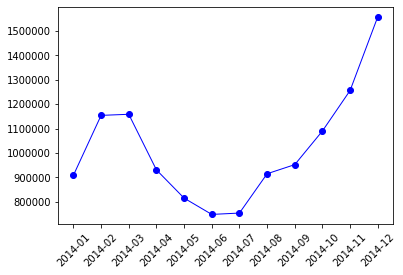

In [129]:
plt.plot(x_axis, gun_2014, marker="o",color="blue", linewidth=1)
plt.xticks(rotation=45)
#plt.savefig("Images/2014_gun_sales.png")

In [98]:
gun_2015=df_2[2015].dropna()
x_axis_1=list(gun_2015.index)

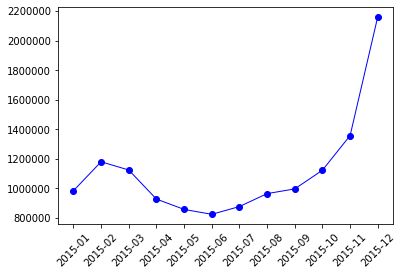

In [130]:
plt.plot(x_axis_1, gun_2015, marker="o",color="blue", linewidth=1)
plt.xticks(rotation=45)
#plt.savefig("Images/2015_gun_sales.png")

In [118]:
gun_2016=df_2[2016].dropna()
x_axis_2=list(gun_2016.index)

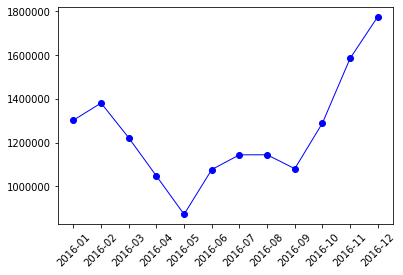

In [131]:
plt.plot(x_axis_2, gun_2016, marker="o",color="blue", linewidth=1)
plt.xticks(rotation=45)
#plt.savefig("Images/2016_gun_sales.png")

In [120]:
gun_2017=df_2[2017].dropna()
x_axis_3=list(gun_2017.index)

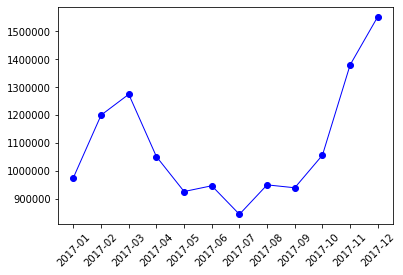

In [132]:
plt.plot(x_axis_3, gun_2017, marker="o",color="blue", linewidth=1)
plt.xticks(rotation=45)
#plt.savefig("Images/2017_gun_sales.png")

In [122]:
gun_2018=df_2[2018].dropna()
x_axis_4=list(gun_2018.index)

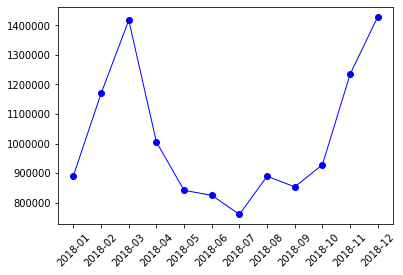

In [133]:
plt.plot(x_axis_4, gun_2018, marker="o",color="blue", linewidth=1)
plt.xticks(rotation=45)
#plt.savefig("Images/2018_gun_sales.png")

In [124]:
gun_2019=df_2[2019].dropna()
x_axis_5=list(gun_2019.index)

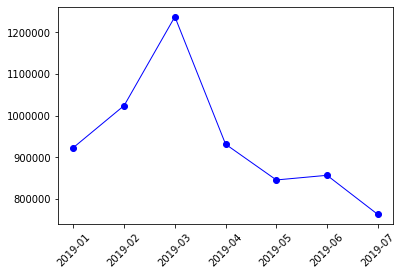

In [134]:
plt.plot(x_axis_5, gun_2019, marker="o",color="blue", linewidth=1)
plt.xticks(rotation=45)
#plt.savefig("Images/2019_gun_sales.png")

# Cleaning mj mass shooting csv file

In [5]:
mj_load='Resources/Mother Jones_Mass Shootings.csv'
mj_df=pd.read_csv(mj_load)
mj_df.head()

,Incident_ID,case,MJ_location,MJ_date,summary,MJ_fatalities,MJ_injured,MJ_total_victims,MJ_loc_type,age_of_shooter,...,weapon_details,shooter_race,shooter_gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,shooting_type,MJ_year
0,99011,Alturas tribal shooting,"Alturas, California",2/20/2014,"Cherie Lash Rhoades, 44, opened fire at the Ce...",4,2,6,Other,44,...,9mm semi-automatic handgun,Native American,Female,http://www.sacbee.com/news/local/crime/article...,-,http://www.sacbee.com/news/local/crime/article...,41.487104,-120.542237,Spree,2014
1,99010,Fort Hood shooting 2,"Fort Hood, Texas",4/3/2014,"Army Specialist Ivan Lopez, 34, opened fire at...",3,12,15,Military,34,...,.45-caliber Smith & Wesson handgun,Latino,M,http://www.cnn.com/2014/04/02/us/fort-hood-sho...,-,http://www.cnn.com/2014/04/02/us/fort-hood-sho...,31.141716,-97.777559,Mass,2014
2,138282,Isla Vista mass murder,"Santa Barbara, California",5/23/2014,"Elliot Rodger, 22, shot three people to death ...",6,13,19,School,22,...,Two Sig Sauer P226 semiautomatic pistols and G...,White,M,http://www.sbsheriff.us/documents/ISLAVISTAINV...,-,http://www.sbsheriff.us/documents/ISLAVISTAINV...,34.436283,-119.871441,Mass,2014
3,210363,Marysville-Pilchuck High School shooting,"Marysville, Washington",10/24/2014,"Jaylen Fryberg, 15, using a .40-caliber Berret...",5,1,6,School,15,...,Beretta .40-caliber handgun,Native American,Male,http://www.seattletimes.com/seattle-news/fourt...,http://www.newyorker.com/science/maria-konniko...,http://www.seattletimes.com/seattle-news/fourt...,48.050824,-122.176918,Mass,2014
4,359830,Charleston Church Shooting,"Charleston, South Carolina",6/17/2015,"Dylann Storm Roof, 21, shot and killed 9 peopl...",9,1,10,Religious,21,...,".45-caliber Glock (model 41, with 13-round cap...",White,Male,http://www.motherjones.com/politics/2015/06/dy...,-,http://www.motherjones.com/politics/2015/06/dy...,32.788387,-79.933143,Mass,2015


In [150]:
new_1 = mj_df["MJ_date"].str.split("/", n = 2, expand = True)
mj_df["Month/Year"]=new_1[2]+"-"+new_1[0]
mj_df.head()

,Incident_ID,case,MJ_location,MJ_date,summary,MJ_fatalities,MJ_injured,MJ_total_victims,MJ_loc_type,age_of_shooter,...,shooter_race,shooter_gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,shooting_type,MJ_year,Month/Year
0,50100,Cascade Mall shooting,"Burlington, Washington",9/23/2016,"Arcan Cetin, 20, killed a teen girl and three ...",5,0,5,Other,20,...,-,M,http://www.nytimes.com/2016/09/25/us/mall-shoo...,http://www.nbcnews.com/news/us-news/arcan-ceti...,http://www.nytimes.com/2016/09/25/us/mall-shoo...,48.461367,-122.337918,Mass,2016,2016-9
1,50188,Baton Rouge police shooting,"Baton Rouge, Lousiana",7/17/2016,"Gavin Long, 29, a former Marine who served in ...",3,3,6,Other,29,...,Black,M,http://time.com/4411027/baton-rouge-shooter-ga...,-,http://time.com/4411027/baton-rouge-shooter-ga...,30.433601,-91.081403,Spree,2016,2016-7
2,50205,Dallas police shooting,"Dallas, Texas",7/7/2016,"Micah Xavier Johnson, a 25-year-old Army veter...",5,11,16,Other,25,...,Black,M,http://www.nytimes.com/2016/07/11/us/dallas-sh...,-,http://www.nytimes.com/2016/07/11/us/dallas-sh...,32.780105,-96.800008,Mass,2016,2016-7
3,50246,Orlando nightclub massacre,"Orlando, Florida",6/12/2016,"Omar Mateen, 29, attacked the Pulse nighclub i...",49,53,102,Other,29,...,Other,M,http://www.motherjones.com/politics/2016/06/as...,-,http://www.motherjones.com/politics/2016/06/as...,28.519718,-81.376777,Mass,2016,2016-6
4,50348,Excel Industries mass shooting,"Hesston, Kansas",2/25/2016,"Cedric L. Ford, who worked as a painter at a m...",3,14,17,Workplace,38,...,Black,M,http://www.nytimes.com/2016/02/26/us/shooting-...,-,http://www.nytimes.com/2016/02/26/us/shooting-...,38.135992,-97.425145,Mass,2016,2016-2


In [6]:
mj_df=mj_df[mj_df.MJ_year > 2013]
mj_df.head()

,Incident_ID,case,MJ_location,MJ_date,summary,MJ_fatalities,MJ_injured,MJ_total_victims,MJ_loc_type,age_of_shooter,...,weapon_details,shooter_race,shooter_gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,shooting_type,MJ_year
0,99011,Alturas tribal shooting,"Alturas, California",2/20/2014,"Cherie Lash Rhoades, 44, opened fire at the Ce...",4,2,6,Other,44,...,9mm semi-automatic handgun,Native American,Female,http://www.sacbee.com/news/local/crime/article...,-,http://www.sacbee.com/news/local/crime/article...,41.487104,-120.542237,Spree,2014
1,99010,Fort Hood shooting 2,"Fort Hood, Texas",4/3/2014,"Army Specialist Ivan Lopez, 34, opened fire at...",3,12,15,Military,34,...,.45-caliber Smith & Wesson handgun,Latino,M,http://www.cnn.com/2014/04/02/us/fort-hood-sho...,-,http://www.cnn.com/2014/04/02/us/fort-hood-sho...,31.141716,-97.777559,Mass,2014
2,138282,Isla Vista mass murder,"Santa Barbara, California",5/23/2014,"Elliot Rodger, 22, shot three people to death ...",6,13,19,School,22,...,Two Sig Sauer P226 semiautomatic pistols and G...,White,M,http://www.sbsheriff.us/documents/ISLAVISTAINV...,-,http://www.sbsheriff.us/documents/ISLAVISTAINV...,34.436283,-119.871441,Mass,2014
3,210363,Marysville-Pilchuck High School shooting,"Marysville, Washington",10/24/2014,"Jaylen Fryberg, 15, using a .40-caliber Berret...",5,1,6,School,15,...,Beretta .40-caliber handgun,Native American,Male,http://www.seattletimes.com/seattle-news/fourt...,http://www.newyorker.com/science/maria-konniko...,http://www.seattletimes.com/seattle-news/fourt...,48.050824,-122.176918,Mass,2014
4,359830,Charleston Church Shooting,"Charleston, South Carolina",6/17/2015,"Dylann Storm Roof, 21, shot and killed 9 peopl...",9,1,10,Religious,21,...,".45-caliber Glock (model 41, with 13-round cap...",White,Male,http://www.motherjones.com/politics/2015/06/dy...,-,http://www.motherjones.com/politics/2015/06/dy...,32.788387,-79.933143,Mass,2015


# Shooters' gender

In [350]:
mj_df["shooter_gender"].value_counts()

M                31
Male              5
F                 1
Male & Female     1
Female            1
Name: shooter_gender, dtype: int64

In [351]:
gender=["Male","Female"]
count=[36,2]

In [352]:
gender_df=pd.DataFrame({"Genders":gender,
                       "count":count})
gender_df

,Genders,count
0,Male,36
1,Female,2


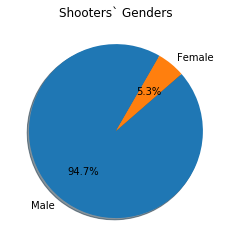

In [355]:
plt.pie(gender_df["count"],labels=gender_df["Genders"],autopct="%1.1f%%",shadow=True, startangle=60)
plt.title("Shooters` Genders")
#plt.savefig("Images/shooters_genders_pie_chart.png")

# Shooters' race

In [356]:
mj_df["shooter_race"].value_counts()

White              17
Black               7
Latino              4
Other               4
-                   4
Native American     2
Asian               1
Name: shooter_race, dtype: int64

In [382]:
#mj_df["shooter_race"]=mj_df["shooter_race"][~mj_df.shooter_race.str.contains("-")]
mj_df["shooter_race"].value_counts()

White              17
Black               7
Latino              4
Other               4
Native American     2
Asian               1
Name: shooter_race, dtype: int64

In [380]:
mj_df["shooter_race"].dropna().unique()

array(['Native American', 'Latino', 'White', 'Other', 'Black', 'Asian'],
      dtype=object)

In [383]:
counts_1=[17,7,4,4,2,1]

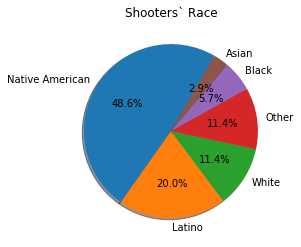

In [386]:
plt.pie(counts_1,labels=mj_df["shooter_race"].dropna().unique(),autopct="%1.1f%%",shadow=True, startangle=60)
plt.title("Shooters` Race")
#plt.savefig("Images/shooters_race_pie_chart.png")

# Obtainment of Weapon

In [408]:
mj_df["weapons_obtained_legally"].value_counts()

Yes                                                                                                                                    22
No                                                                                                                                      5
TBD                                                                                                                                     4
Unknown                                                                                                                                 3
\r\nYes                                                                                                                                 2
-                                                                                                                                       1
Kelley passed federal criminal background checks; the US Air Force failed to provide information on his criminal history to the FBI     1
Yes ("some of the weapons were pur

In [417]:
way_obtainment=["Legal","Illegal"]
count_1=[25,5]

In [419]:
way_df=pd.DataFrame({"way":way_obtainment,
                       "count":count_1})
way_df

,way,count
0,Legal,25
1,Illegal,5


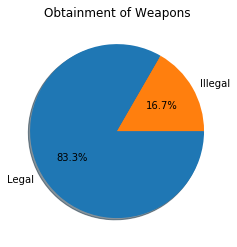

In [423]:
plt.pie(way_df["count"],labels=way_df["way"],autopct="%1.1f%%",shadow=True, startangle=60)
plt.title("Obtainment of Weapons")
#plt.savefig("Images/obtainment_weapons.png")

# Total Victims

In [6]:
group_mj_year=mj_df.groupby(["MJ_year"])
sum_victim=group_mj_year["MJ_total_victims"].sum()
df_victim=pd.DataFrame({"Total Victims":sum_victim})
df_victim.head()

,Total Victims
MJ_year,
2014,46
2015,82
2016,154
2017,692
2018,144


In [7]:
x_axis_victim=list(df_victim.index)
x_axis_victim

[2014, 2015, 2016, 2017, 2018, 2019]

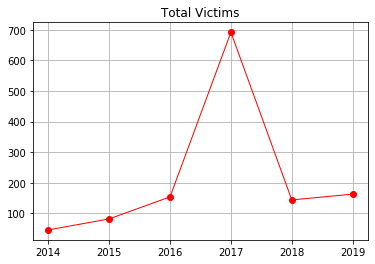

In [9]:
plt.plot(x_axis_victim, df_victim["Total Victims"], marker="o",color="red", linewidth=1)
plt.grid()
plt.title("Total Victims")
#plt.savefig("Images/total_victims_yearly.png")

# Location Type

In [8]:
mj_df["MJ_loc_type"].value_counts()

Other            14
Workplace        13
School            5
Religious         3
Military          2
\r\nWorkplace     1
Airport           1
Name: MJ_loc_type, dtype: int64

In [9]:
mj_df["MJ_loc_type"]=mj_df["MJ_loc_type"].replace({"\r\nWorkplace":"Workplace"})

In [10]:
mj_df["MJ_loc_type"].value_counts()

Other        14
Workplace    14
School        5
Religious     3
Military      2
Airport       1
Name: MJ_loc_type, dtype: int64

In [12]:
group_mj_loc=mj_df.groupby(["MJ_loc_type"])
sum_loc=group_mj_loc["Incident_ID"].count()
df_loc=pd.DataFrame({"Location":sum_loc})
df_loc

,Location
MJ_loc_type,
Airport,1
Military,2
Other,14
Religious,3
School,5
Workplace,14


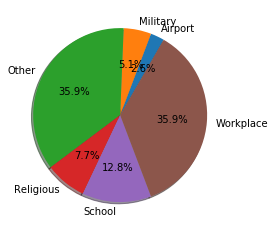

In [14]:
plt.pie(df_loc["Location"],labels=list(df_loc.index),autopct="%1.1f%%",shadow=True, startangle=60)
#plt.savefig("Images/location_type.png")